Running both Logistic Regression and Linear Regression models...
File '/mnt/data/phishing.csv' not found. Attempting to load 'phishing.csv' from current directory or prompting for upload.
'phishing.csv' not found in current directory. Please upload 'phishing.csv'.


Saving phishing.csv to phishing.csv
Dataset Shape: (11054, 32)
   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1     

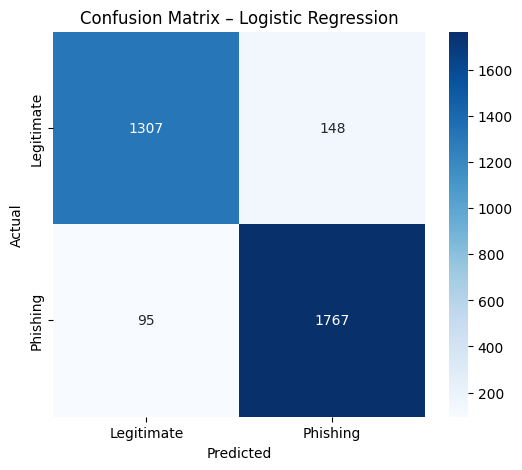

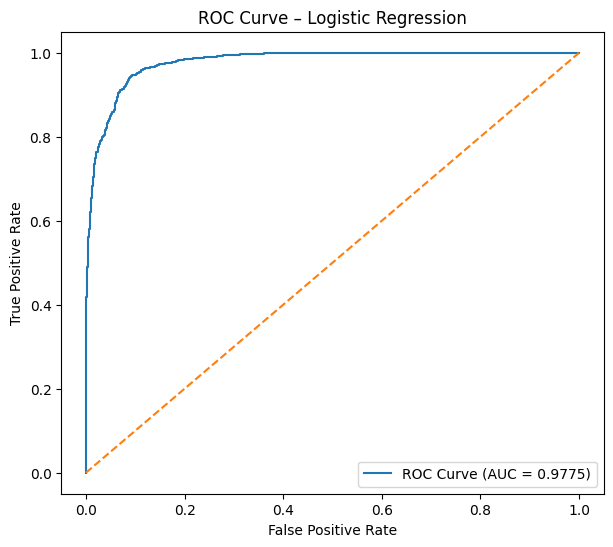

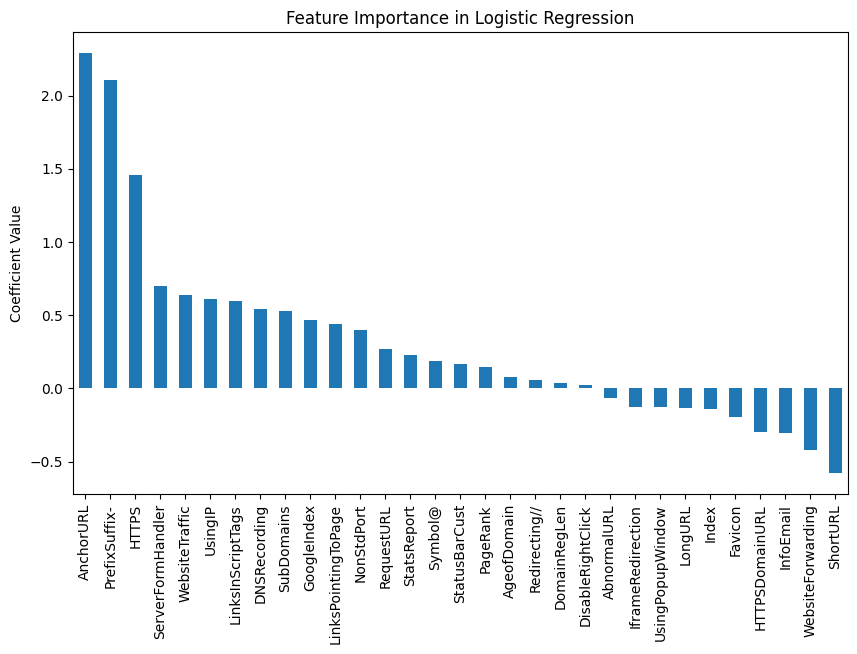


Logistic Regression Intercept (b0): 1.0330118259488312
Logistic Regression Coefficients:
Index: -0.13786576507727114
UsingIP: 0.612069322408425
LongURL: -0.1372353432133436
ShortURL: -0.5801489539777381
Symbol@: 0.18399100448047184
Redirecting//: 0.053924664953780475
PrefixSuffix-: 2.1074817443300997
SubDomains: 0.5304362803035259
HTTPS: 1.460013194497112
DomainRegLen: 0.036057361839474805
Favicon: -0.19501401005795177
NonStdPort: 0.3993004248504772
HTTPSDomainURL: -0.29890645848014313
RequestURL: 0.2709997750972327
AnchorURL: 2.289847464180018
LinksInScriptTags: 0.597681424631365
ServerFormHandler: 0.6983623700808214
InfoEmail: -0.30548316713082524
AbnormalURL: -0.06848615188404776
WebsiteForwarding: -0.41874823519745535
StatusBarCust: 0.16559360533909115
DisableRightClick: 0.02441602215632478
UsingPopupWindow: -0.12734143819098748
IframeRedirection: -0.12548919139443365
AgeofDomain: 0.07857792081575567
DNSRecording: 0.5401111735047753
WebsiteTraffic: 0.6347794707312321
PageRank: 0.1

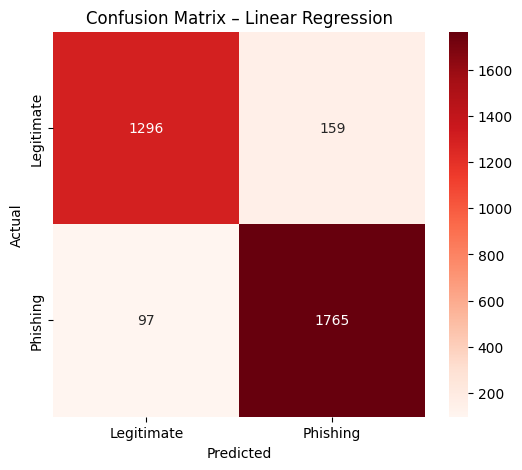

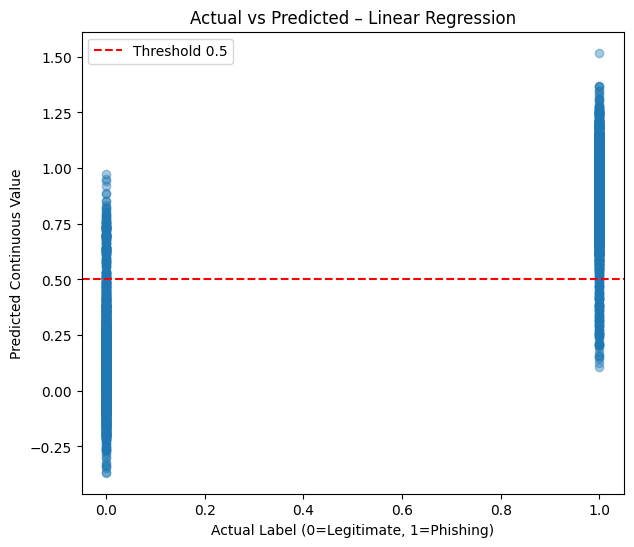

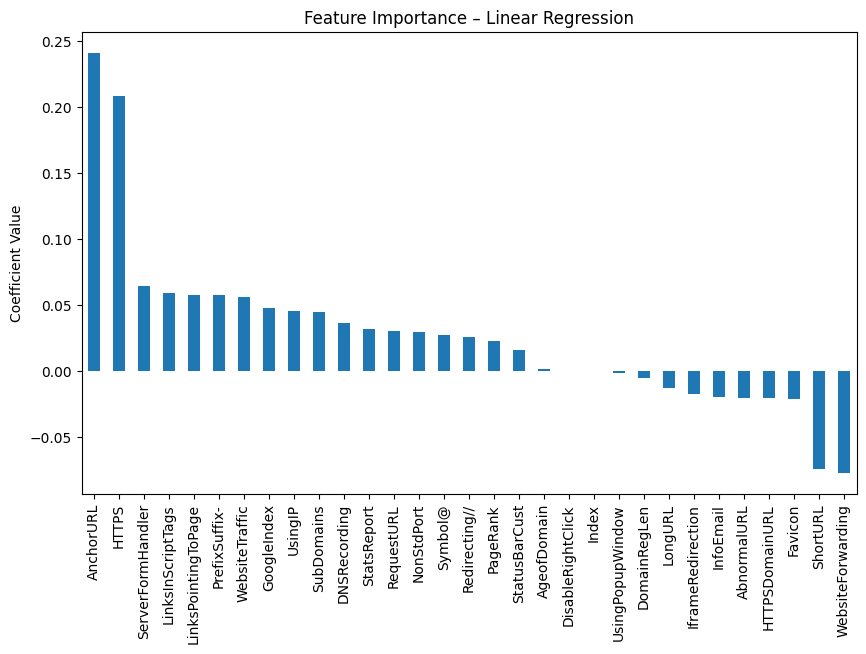


Linear Regression Intercept (b0): 0.5525109708962723
Linear Regression Coefficients:
Index: -2.4136167860499328e-06
UsingIP: 0.04579682694709826
LongURL: -0.012666915428581792
ShortURL: -0.07387032010359144
Symbol@: 0.02774204479757832
Redirecting//: 0.026234483212919147
PrefixSuffix-: 0.05736175140251592
SubDomains: 0.0451847790628682
HTTPS: 0.20858704687554663
DomainRegLen: -0.005428443172240626
Favicon: -0.02115064245254335
NonStdPort: 0.03001967715616689
HTTPSDomainURL: -0.020122619011913073
RequestURL: 0.03012786632894973
AnchorURL: 0.24102135071331732
LinksInScriptTags: 0.0595473396675898
ServerFormHandler: 0.0648136003726666
InfoEmail: -0.019311631189308693
AbnormalURL: -0.02006073366643025
WebsiteForwarding: -0.0774611487626653
StatusBarCust: 0.016040351676942594
DisableRightClick: 0.000376277889236342
UsingPopupWindow: -0.001488103956969292
IframeRedirection: -0.017287116583704833
AgeofDomain: 0.001322202233390986
DNSRecording: 0.036382762946065406
WebsiteTraffic: 0.056470444

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files # Import files module

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc,
    mean_absolute_error, mean_squared_error, r2_score
)

print("Running both Logistic Regression and Linear Regression models...")

# ==============================
# 1. Load Dataset
# ==============================

file_path = '/mnt/data/phishing.csv'
file_name_expected = 'phishing.csv'

if not os.path.exists(file_path): # If the original path doesn't exist
    print(f"File '{file_path}' not found. Attempting to load '{file_name_expected}' from current directory or prompting for upload.")
    if os.path.exists(file_name_expected):
        print(f"Found '{file_name_expected}' in current directory.")
        df = pd.read_csv(file_name_expected)
    else:
        print(f"'{file_name_expected}' not found in current directory. Please upload '{file_name_expected}'.")
        uploaded = files.upload()
        if file_name_expected in uploaded:
            df = pd.read_csv(file_name_expected)
        elif uploaded:
            # If user uploads a file with a different name, use that one
            uploaded_filename = list(uploaded.keys())[0]
            print(f"Reading uploaded file: {uploaded_filename}")
            df = pd.read_csv(uploaded_filename)
        else:
            raise FileNotFoundError(f"No file uploaded. Please upload '{file_name_expected}'.")
else:
    print(f"Reading file from: {file_path}")
    df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

# ==============================
# 2. Data Preprocessing
# ==============================

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# Assuming last column is target (0 = Legitimate, 1 = Phishing)
# Note: Original dataset might have -1 and 1 for target.
# For Linear Regression, we often want 0 and 1, so let's normalize y to 0/1 for both if it's -1/1.
# Let's check the unique values of y to decide.
if -1 in df.iloc[:, -1].unique():
    print("\nConverting target variable -1 to 0 for consistent binary classification.")
    y_original = df.iloc[:, -1].apply(lambda x: 1 if x == 1 else 0) # Convert -1 to 0
else:
    y_original = df.iloc[:, -1]

X = df.iloc[:, :-1]
y = y_original

# ==============================
# 3. Train-Test Split
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# =================================================
#           Logistic Regression Model
# =================================================

print("\n=================================================")
print("           LOGISTIC REGRESSION MODEL             ")
print("=================================================")

# 4. Feature Scaling (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model Training
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_prob_logistic = logistic_model.predict_proba(X_test_scaled)[:,1]

# 6. Model Evaluation
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Model Accuracy:", accuracy_logistic*100, "%")

print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_logistic))

# 7. Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(6,5))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. ROC Curve
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(figsize=(7,6))
plt.plot(fpr_logistic, tpr_logistic, label="ROC Curve (AUC = %0.4f)" % roc_auc_logistic)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()

# 9. Feature Importance
coefficients_logistic = logistic_model.coef_[0]
feature_importance_logistic = pd.Series(coefficients_logistic, index=X.columns)
feature_importance_logistic = feature_importance_logistic.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance_logistic.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.show()

# 10. Mathematical Equation
print("\nLogistic Regression Intercept (b0):", logistic_model.intercept_[0])

print("Logistic Regression Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {logistic_model.coef_[0][i]}")

print("\nLogistic Regression Equation:")
print("P(Phishing) = 1 / (1 + e^-(b0 + b1x1 + b2x2 + ... + bnxn))")


# =================================================
#            Linear Regression Model
# =================================================

print("\n\n=================================================")
print("             LINEAR REGRESSION MODEL             ")
print("=================================================")

# 4. Linear Regression Model Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions (continuous values)
y_pred_cont_linear = linear_model.predict(X_test)

# Convert to binary using threshold 0.5 (for classification evaluation)
y_pred_linear = [1 if val > 0.5 else 0 for val in y_pred_cont_linear]

# 5. Performance Metrics
mae_linear = mean_absolute_error(y_test, y_pred_cont_linear)
mse_linear = mean_squared_error(y_test, y_pred_cont_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_cont_linear)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("\n--- Linear Regression Performance ---")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R2 Score:", r2_linear)
print("Classification Accuracy:", accuracy_linear*100, "%")

# 6. Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(6,5))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix – Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Actual vs Predicted Graph
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_cont_linear, alpha=0.4)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.xlabel("Actual Label (0=Legitimate, 1=Phishing)")
plt.ylabel("Predicted Continuous Value")
plt.title("Actual vs Predicted – Linear Regression")
plt.legend()
plt.show()

# 8. Feature Importance
coefficients_linear = pd.Series(linear_model.coef_, index=X.columns)
coefficients_linear = coefficients_linear.sort_values(ascending=False)

plt.figure(figsize=(10,6))
coefficients_linear.plot(kind='bar')
plt.title("Feature Importance – Linear Regression")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.show()

# 9. Regression Equation
print("\nLinear Regression Intercept (b0):", linear_model.intercept_)

print("Linear Regression Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {linear_model.coef_[i]}")

print("\nLinear Regression Equation:")
print("y = b0 + b1x1 + b2x2 + ... + bnxn")